I observed a certain outcome 
 for a variable 
 where variable 
 was set to a value 
. What would have happened to the value of 
, had I intervened on 
 to assign it a different value 
?



In [2]:
import networkx as nx, numpy as np, pandas as pd
from dowhy import gcm
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)

In [3]:
#Treat dataset

#Import data 
# data = pd.read_csv('../datasets/consolidated.csv',header=0, index_col=0)
data = pd.read_csv('../Datasets/Networkwise/consolidated_5s.csv',header=0, index_col=0)
consolidated = pd.DataFrame(data)


consolidated = consolidated.drop(columns=['experiment', 'topology'])#, 'messageBandwidth'])#, 'gossipBandwidth'])#, 'messageDuplicated'])#, 'n_nodes', 'consensus', 'messageDuplicated'])
# consolidated = consolidated.loc[consolidated['totalBandwidth'] > 0]
# consolidated.head(100)

consolidateddiff = consolidated.dropna().dropna()

X = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']].to_numpy()
training_data = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']]


training_data.head(100)

,d,messageReceived,graft,prune,dlo,dhi,dout,messageOverhead,topics,topicSize
0,8,43.0,0.0,0.0,6,12,2,321.0,1,16
1,8,54.0,0.0,0.0,6,12,2,389.0,1,16
2,8,96.0,0.0,0.0,6,12,2,702.0,1,16
3,8,88.0,0.0,0.0,6,12,2,629.0,1,16
4,8,61.0,0.0,0.0,6,12,2,454.0,1,16
5,8,96.0,0.0,0.0,6,12,2,686.0,1,16
6,8,85.0,0.0,0.0,6,12,2,615.0,1,16
7,8,85.0,0.0,0.0,6,12,2,649.0,1,16
8,8,98.0,0.0,0.0,6,12,2,724.0,1,16
9,8,74.0,0.0,0.0,6,12,2,559.0,1,16


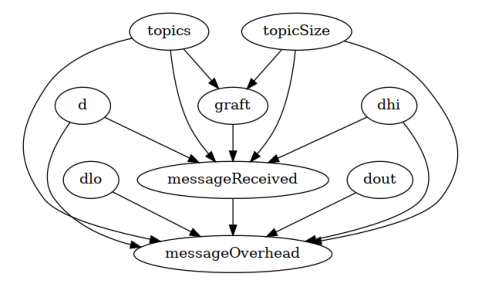

In [4]:
causal_graph = nx.read_adjlist("../1_Discovery/MessageOverhead/AdjLists/pcStable5s.adjlist", create_using=nx.DiGraph)
causal_graph.remove_node('prune')

G=gcm.util.plot(causal_graph, figure_size=[6, 8])

In [5]:
causal_model = gcm.InvertibleStructuralCausalModel(causal_graph) # X -> Y -> Z
gcm.auto.assign_causal_mechanisms(causal_model, training_data)

In [6]:
gcm.fit(causal_model, training_data)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:07<00:00,  1.20it/s]      


In [ ]:
topicSizeIntervention = [1,2,4,8,16,18,22,23]
topicsIntervention = [16]

simulatedTopics = pd.DataFrame()
simulated = pd.DataFrame()

for i in topicSizeIntervention:
    samples = gcm.counterfactual_samples(causal_model,
                                     {'topicSize': lambda x: i},
                                     observed_data=pd.DataFrame(training_data))
    for j in topicsIntervention:
        causal_model2 = gcm.InvertibleStructuralCausalModel(causal_graph)
        gcm.auto.assign_causal_mechanisms(causal_model2, samples)
        gcm.fit(causal_model2, samples)
                    
        samplesTopics = gcm.counterfactual_samples(causal_model2,
                                     {'topics': lambda x: j},
                                     observed_data=pd.DataFrame(samples))
        simulatedTopics = pd.concat([simulatedTopics, samplesTopics])
    
    simulated =  pd.concat([simulated, simulatedTopics])

simulated = simulated.reset_index()
simulated.head(100)

# interventions = simulated.loc[(simulated['messageOverhead'] > 0)]# &  (simulated['messageReceived'] > 0) & (simulated['graft'] > 0) ]
# interventions = interventions.loc[(interventions['d'] == 8) & (interventions['dlo'] == 6) & (interventions['dhi'] == 12) & (interventions['dout'] == 2)]
# intervention = interventions.groupby(['d', 'dlo','dhi','dout','topics', 'topicSize']).mean()

# intervention = intervention.reset_index()

# intervention.head(100)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]      


In [ ]:
values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# dout = [2,8,16,24]

simulated = pd.DataFrame()

samples = gcm.counterfactual_samples(causal_model,
                                     {'topicSize': lambda x: 16},
                                     observed_data=pd.DataFrame(training_data))
causal_model2 = gcm.InvertibleStructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model2, samples)
gcm.fit(causal_model2, samples)
                    
samples2 = gcm.counterfactual_samples(causal_model2,
                                     {'topics': lambda x: 8},
                                      observed_data=pd.DataFrame(samples))
causal_model3 = gcm.InvertibleStructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model3, samples2)
gcm.fit(causal_model3, samples2)

for d in values:
    samples3 = gcm.counterfactual_samples(causal_model3,
                                     {'d': lambda x: d},
                                      observed_data=pd.DataFrame(samples2))
    simulated =  pd.concat([simulated, samples3])

simulated = simulated.reset_index()

interventions2 = simulated.loc[(simulated['messageOverhead'] > 0)]# &  (simulated['messageReceived'] > 0) & (simulated['graft'] > 0) ]
# interventions2 = interventions2.loc[(interventions2['dlo'] == (interventions2['d']-4)) & (interventions2['dhi'] == (interventions2['d']+4)) & (interventions2['dout'] == 2)]
intervention2 = interventions2.drop(columns=['dhi', 'dlo', 'dout']).groupby(['d','topics', 'topicSize']).mean()


intervention2 = intervention2.reset_index()

intervention2.head(500)

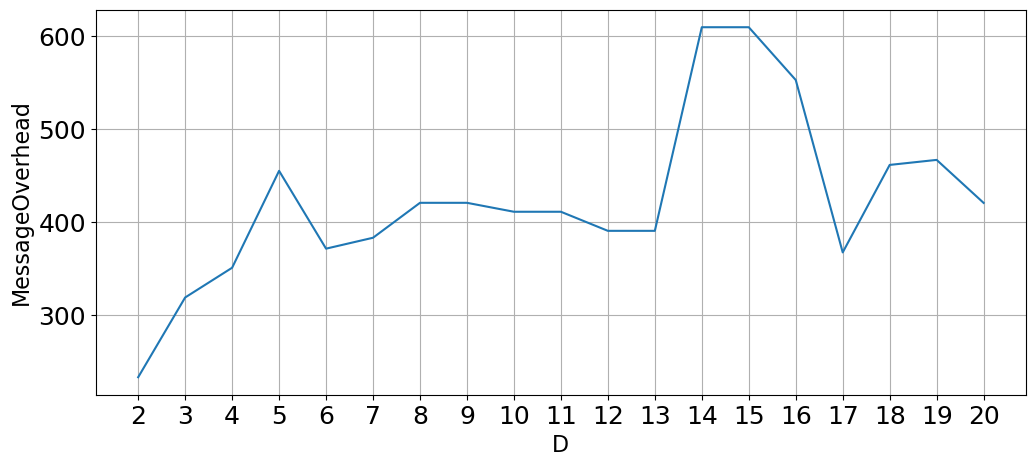

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(intervention2['d'], intervention2['messageOverhead'])

# ax2.bar(simulated['topicSize'], simulated['topics'], color ='pink', width = 0.4, alpha=0.5)
ax.set(xlabel='D', ylabel='MessageOverhead')


plt.xticks(ticks=values, labels=values,fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update({'font.size': 16})

# ax.set_ylim(0, 25)
# ax.legend(loc='upper right', ncols=2)
ax.grid()

fig.savefig("dCounterfactual.png")
fig.savefig('dCounterfactual.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight', dpi=600)
plt.show()

